In [5]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

PROJECT_ROOT_DIR="."
CHAPTER_ID="end_to_end_project"
IMAGE_PATH=os.path.join("images",CHAPTER_ID)

def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path=os.path.join(IMAGE_PATH,fig_id+"."+fig_extension)
    print("Saving figure",path)
    if tight_layout:
        plt.tight_layout
    plt.savefig(path,format=fig_extension,dpi=resolution)

In [6]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
# fetch_housing_data()

In [8]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    print(housing_path)
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [9]:
housing=load_housing_data()
housing.head()

datasets/housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure images/end_to_end_project/attribute_histogram_plots.png


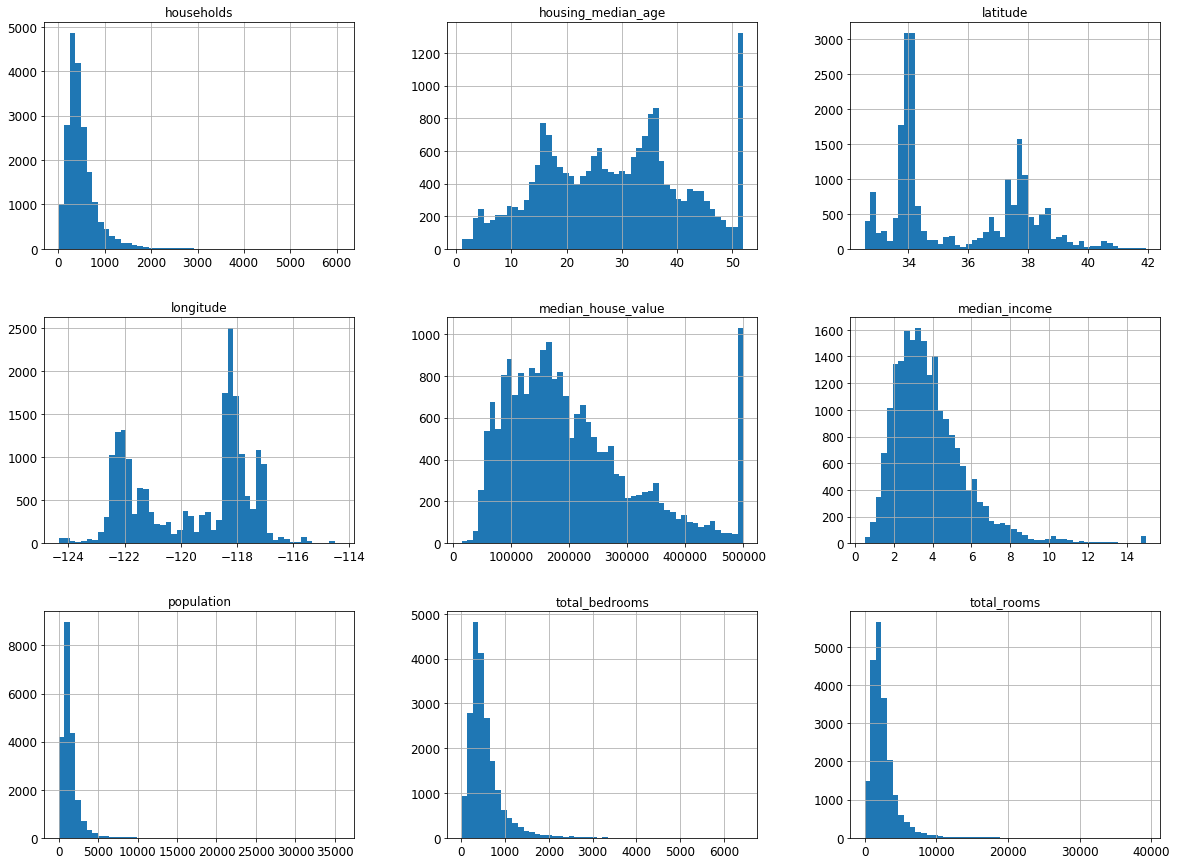

In [13]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [10]:
np.random.seed(42)

In [11]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print("train",len(train_set),"+test",len(test_set))

train 16512 +test 4128


In [12]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


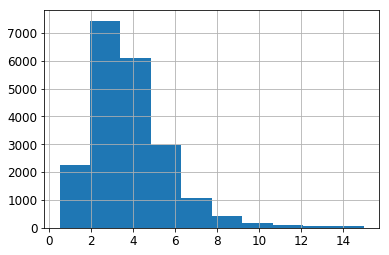

In [13]:
housing["median_income"].hist()

In [14]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [15]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

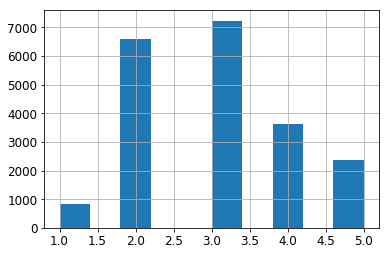

In [16]:
housing['income_cat'].hist()

In [17]:
def income_cat_properties(data):
    return data["income_cat"].value_counts()/len(data)

strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,random_state=42)

compare_props=pd.DataFrame({
    "Overall":income_cat_properties(housing),
    "Stratified":income_cat_properties(strat_train_set),
    "Random":income_cat_properties(strat_test_set),
})

compare_props["Rand. %error"]=100*compare_props["Random"]/compare_props["Overall"]-100
compare_props["Strat. %error"]=100*compare_props["Stratified"]/compare_props["Overall"]-100

In [18]:
compare_props.sort_index()

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.317466,0.324370,1.732260,-0.433065
3.0,0.350581,0.348595,0.358527,2.266446,-0.566611
4.0,0.176308,0.178537,0.167393,-5.056334,1.264084
5.0,0.114438,0.115673,0.109496,-4.318374,1.079594


In [19]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [20]:
del strat_test_set["income_cat"]

In [21]:
del strat_train_set["income_cat"]

Saving figure images/end_to_end_project/bad_visualization_plot.png


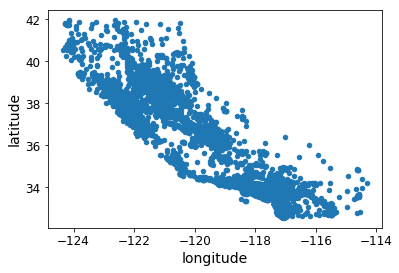

In [22]:
housing=strat_train_set.copy()
housing.plot(kind="scatter",x="longitude",y="latitude")
save_fig("bad_visualization_plot")

Saving figure images/end_to_end_project/better_visualization_plot.png


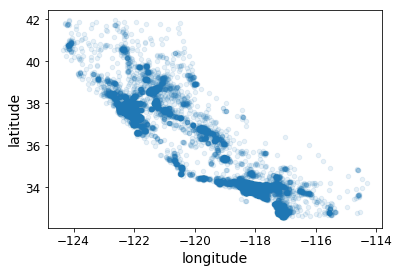

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure images/end_to_end_project/housing_prices_scatterplot.png


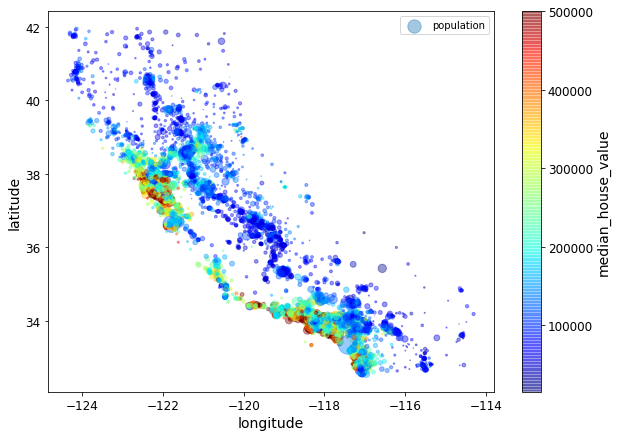

In [24]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7)
            ,c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [25]:
corr_matrix=housing.corr()

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

Saving figure images/end_to_end_project/california_housing_prices_plot.png


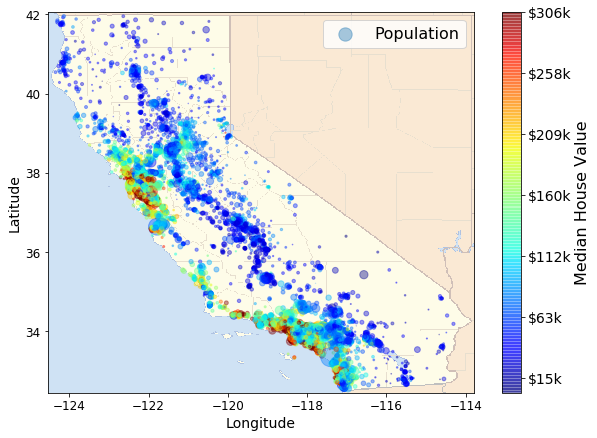

In [27]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1168c7cf8>,
      dtype=object)

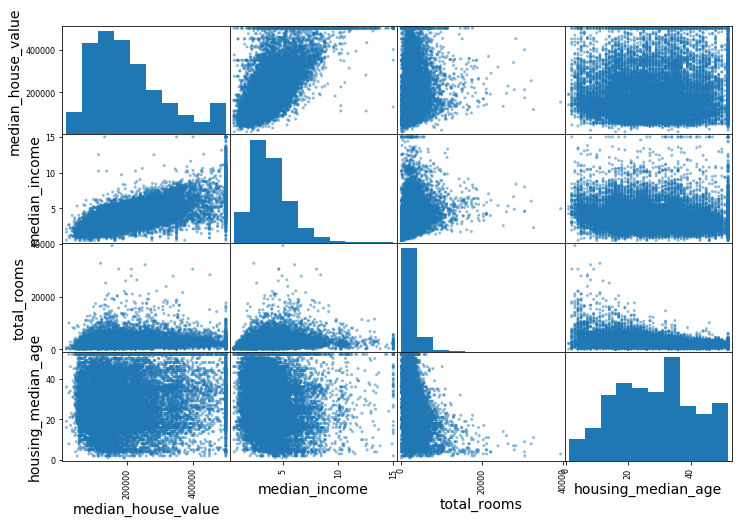

In [28]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

Saving figure images/end_to_end_project/income_vs_house_value_scatterplot.png


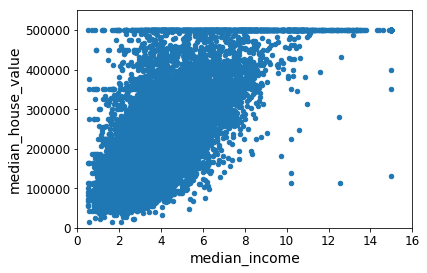

In [29]:
housing.plot(kind="scatter",x="median_income",y="median_house_value")
plt.axis([0,16,0,550000])
save_fig("income_vs_house_value_scatterplot")

In [30]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [31]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

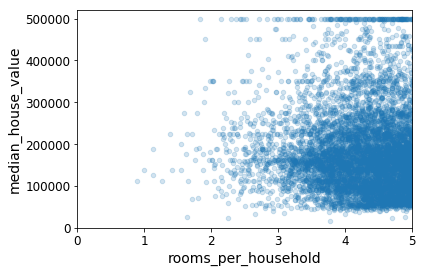

In [32]:
housing.plot(kind="scatter",x="rooms_per_household",y="median_house_value",alpha=0.2)
plt.axis([0,5,0,520000])
plt.show()

In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738,5.435235,0.212858,3.096961
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448,2.387375,0.057995,11.578744
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.692308
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000,4.452055,0.175178,2.428799
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000,5.235874,0.202808,2.817240
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000,6.061037,0.239501,3.280000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


Prepare the data for machine learning algorithms

In [34]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [35]:
sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head()

In [36]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [37]:
from sklearn.preprocessing import Imputer

imputer=Imputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)

In [38]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [40]:
housing.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [41]:
X=imputer.transform(housing_num)

In [42]:
housing_cat=housing["ocean_proximity"]

In [43]:
housing_cat

14196    NEAR OCEAN
8267     NEAR OCEAN
17445    NEAR OCEAN
14265    NEAR OCEAN
2271         INLAND
17848     <1H OCEAN
6252      <1H OCEAN
9389       NEAR BAY
6113      <1H OCEAN
6061      <1H OCEAN
16030      NEAR BAY
8364      <1H OCEAN
9448         INLAND
17529     <1H OCEAN
5865      <1H OCEAN
7615      <1H OCEAN
9707      <1H OCEAN
16332        INLAND
3449      <1H OCEAN
5199      <1H OCEAN
13496        INLAND
18056     <1H OCEAN
9529      <1H OCEAN
5128      <1H OCEAN
18796        INLAND
413        NEAR BAY
1175         INLAND
4387      <1H OCEAN
11628     <1H OCEAN
9787      <1H OCEAN
            ...    
1267         INLAND
1899         INLAND
3005         INLAND
19118     <1H OCEAN
189        NEAR BAY
2747         INLAND
18431     <1H OCEAN
18942        INLAND
8666     NEAR OCEAN
6396         INLAND
19769        INLAND
17568     <1H OCEAN
6420         INLAND
5051      <1H OCEAN
5311      <1H OCEAN
2433         INLAND
769        NEAR BAY
1685       NEAR BAY
8322      <1H OCEAN


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 4, 4, ..., 0, 0, 3])

In [45]:
housing_cat_encoded[:10]

array([4, 4, 4, 4, 1, 0, 0, 3, 0, 0])

In [46]:
housing_cat_encoded,housing_categories=housing_cat.factorize()
housing_cat_encoded[:10]
housing_categories[:10]

Index(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

one-hot encodeing 一个常见的方法是给每个分类创建一个二元属性

In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [49]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [50]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        
        
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)
housing_extra_attribs

array([[-117.03, 32.71, 33.0, ..., 'NEAR OCEAN', 5.017656500802568,
        3.691813804173355],
       [-118.16, 33.77, 49.0, ..., 'NEAR OCEAN', 4.473544973544974,
        1.7380952380952381],
       [-120.48, 34.66, 4.0, ..., 'NEAR OCEAN', 5.645833333333333,
        2.7232142857142856],
       ...,
       [-118.38, 34.03, 36.0, ..., '<1H OCEAN', 3.9867172675521823,
        3.332068311195446],
       [-121.96, 37.58, 15.0, ..., '<1H OCEAN', 6.395348837209302,
        3.178890876565295],
       [-122.42, 37.77, 52.0, ..., 'NEAR BAY', 3.4025764895330113,
        2.108695652173913]], dtype=object)

In [51]:
# from sklearn.base import BaseEstimator,TransformerMixin
# rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

# class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
#     def __init__(self,add_bedrooms_per_room=True):
#         self.add_bedrooms_per_room=add_bedrooms_per_room
#     def fit(self,X,y=None):
#         return self
#     def transform(self,X,y=None):
#         rooms_per_household=X[:,rooms_ix]/X[:,rooms_ix]
#         population_per_household=X[:,population_ix]/X[:,household_ix]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
#             return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
#         else:
#             return np.c_[X,rooms_per_household,population_per_household]
  
# attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs=attr_adder.transform(housing.values)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',Imputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

housing_num_tr=num_pipeline.fit_transform(housing_num)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
17848,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227
6252,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192
9389,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892
6113,-117.90,34.13,5.0,1126.0,316.0,819.0,311.0,1.5000
6061,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266


In [58]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
 
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """
 
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown
 
    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """
 
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)
 
        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)
 
        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")
 
        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape
 
        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]
 
        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))
 
        self.categories_ = [le.classes_ for le in self._label_encoders_]
 
        return self
 
    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)
 
        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])
 
            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])
 
        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)
 
        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)
 
        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]
 
        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out   

In [63]:
from sklearn.pipeline import FeatureUnion

num_attributes=list(housing_num)
cat_attribs=["ocean_proximity"]

num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('imputer',Imputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer', CategoricalEncoder(encoding="onehot-dense"))
])

full_pipeline=FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline)
])

In [64]:
housing_prepared=full_pipeline.fit_transform(housing)
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("Predictions:\t",lin_reg.predict(some_data_prepared))
print("Labels:\t\t",list(some_labels))

Predictions:	 [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]
Labels:		 [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [69]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [70]:
rmse_scores=np.sqrt(-scores)

In [71]:
rmse_scores

array([65462.10470169, 71046.73181094, 69263.14486615, 70208.71515778,
       72733.35835921, 68405.30053682, 65617.45758063, 67563.75011539,
       66238.84933261, 69333.32679195])

In [80]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean",scores.mean())
    print("Standard deviation",scores.std())
    
display_scores(rmse_scores)    

Scores: [49248.26042344 53713.45647092 51651.24621818 54497.9913717
 54558.30052923 48863.66594376 50358.91032129 53682.40155325
 50915.58697843 53578.35958844]
Mean 52106.81793986357
Standard deviation 2057.3722795733597


In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_reg= RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_mse


483447825.0268011

In [82]:
scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

Scores: [49931.01259277 54374.44789575 52251.58369364 53592.19754371
 55312.45127912 50578.17985264 49509.56066483 53278.19378032
 51478.98181331 51650.81887294]
Mean 52195.7427989028
Standard deviation 1826.3982994213125


In [87]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [88]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [89]:
cvres=grid_search.cv_results_

In [90]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63818.28043983194 {'max_features': 2, 'n_estimators': 3}
54865.541018267206 {'max_features': 2, 'n_estimators': 10}
52575.20244639693 {'max_features': 2, 'n_estimators': 30}
60407.719815858196 {'max_features': 4, 'n_estimators': 3}
52492.072857670806 {'max_features': 4, 'n_estimators': 10}
50028.95664492806 {'max_features': 4, 'n_estimators': 30}
59414.363082408825 {'max_features': 6, 'n_estimators': 3}
52318.08509780906 {'max_features': 6, 'n_estimators': 10}
50052.02609002761 {'max_features': 6, 'n_estimators': 30}
58729.12182059952 {'max_features': 8, 'n_estimators': 3}
52254.96772637452 {'max_features': 8, 'n_estimators': 10}
50027.081501121065 {'max_features': 8, 'n_estimators': 30}
61636.25350750752 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53978.70908730179 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60284.796744701984 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52059.21355700785 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [91]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([6.86503637e-02, 6.10100656e-02, 4.12633134e-02, 1.53875595e-02,
       1.44472402e-02, 1.65621106e-02, 1.35071534e-02, 3.71451315e-01,
       5.54377438e-02, 1.09849952e-01, 5.01932431e-02, 4.59236244e-03,
       1.72856702e-01, 1.22457154e-04, 1.85139909e-03, 2.81701857e-03])

In [92]:
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs=list(encoder.classes_)
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

NameError: name 'num_attribs' is not defined